In [1]:
import pandas as pd

In [2]:
from pandasql import sqldf

In [3]:
from pandasql import sqldf
from scipy import stats
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, KBinsDiscretizer, PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.feature_selection import VarianceThreshold

# model training/tuning
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.dummy import DummyClassifier

# models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# model validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, make_scorer




In [49]:
import csv
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"


In [5]:
math=pd.read_csv('/Users/elzbietapolak/Desktop/student/student-mat.csv')

In [6]:
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
# Showing all columns
pd.set_option('display.max_columns', None)



In [8]:
# Creating a subdataframe with only numerical columns
math.select_dtypes(include='number').describe()
mathNum=math.select_dtypes(include='number').copy()
# Aside from age, all cols up to failures on a scale 1-4,
#from famrel to health on a scale 1-5, the rest actual numbers


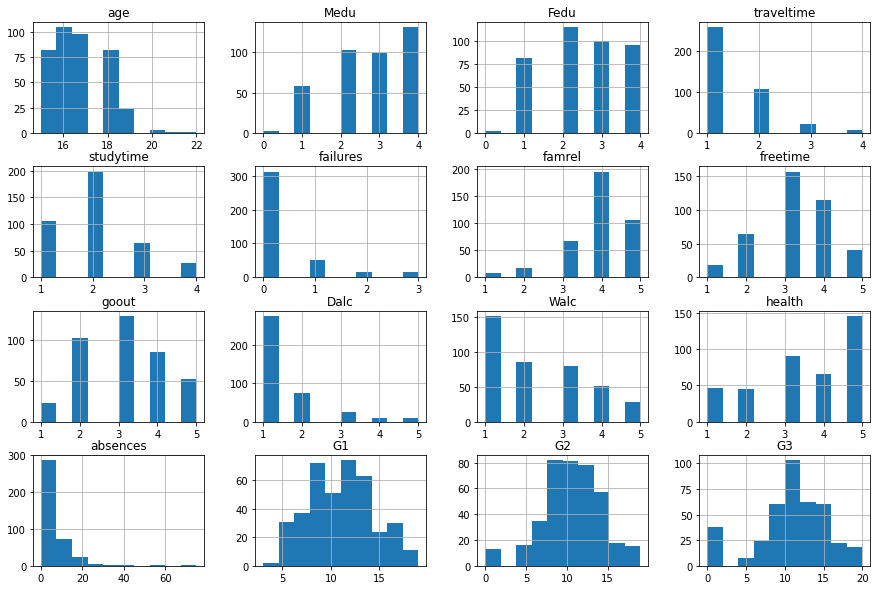

In [9]:
# Plotting all columns
math.hist(layout=(4,4), figsize=(15,10))

plt.show()

In [13]:
# Right-sided distributions:traveltime, studytime,failures, Walc, Dalc, absences
# Normal distributions: freetime, goout, G's

In [10]:
mathNum=math.select_dtypes(include='number').copy()



In [11]:
mathNum

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [12]:
# Columns with scale 1-4
mathFirst = mathNum.iloc[:, 1:6]

In [13]:
mathFirst

,Medu,Fedu,traveltime,studytime,failures
0,4,4,2,2,0
1,1,1,1,2,0
2,1,1,1,2,3
3,4,2,1,3,0
4,3,3,1,2,0
...,...,...,...,...,...
390,2,2,1,2,2
391,3,1,2,1,0
392,1,1,1,1,3
393,3,2,3,1,0


In [14]:
# Checking correlation of columns in mathFirst and plotting

corr_matrix1 = mathFirst.corr('pearson')
corr_matrix1.style.background_gradient(cmap='coolwarm')

,Medu,Fedu,traveltime,studytime,failures
Medu,1.000000,0.623455,-0.171639,0.064944,-0.236680
Fedu,0.623455,1.000000,-0.158194,-0.009175,-0.250408
traveltime,-0.171639,-0.158194,1.000000,-0.100909,0.092239
studytime,0.064944,-0.009175,-0.100909,1.000000,-0.173563
failures,-0.236680,-0.250408,0.092239,-0.173563,1.000000


In [19]:
# We see that mother's and father's education are strongly correlated, so we can drop one column

In [15]:
# Columns with scale 1-5
mathSecond=mathNum.iloc[:, 6:12]

In [16]:
mathSecond

,famrel,freetime,goout,Dalc,Walc,health
0,4,3,4,1,1,3
1,5,3,3,1,1,3
2,4,3,2,2,3,3
3,3,2,2,1,1,5
4,4,3,2,1,2,5
...,...,...,...,...,...,...
390,5,5,4,4,5,4
391,2,4,5,3,4,2
392,5,5,3,3,3,3
393,4,4,1,3,4,5


In [17]:
corr_matrix2 = mathSecond.corr('pearson')
corr_matrix2.style.background_gradient(cmap='coolwarm')

,famrel,freetime,goout,Dalc,Walc,health
famrel,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056
freetime,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733
goout,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577
Dalc,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180
Walc,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476
health,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000


In [23]:
# Here we see that workday alcohol consumption and weekend alcohol consumption are correlated, so we can drop one.

In [18]:
# Last three columns
mathLast3=mathNum.iloc[:,13:16]

In [19]:
mathLast3.describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [20]:
corr_matrix3 = mathLast3.corr('pearson')
corr_matrix3.style.background_gradient(cmap='coolwarm')

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


In [27]:
# I don't understand colors here but maybe we could drop G1.

In [21]:
# Just for fun, correlation of absences and G3, need to rescale them to common scale.
absG3=mathNum[["absences", "G3"]]
corr_matrix4 = absG3.corr('pearson')
corr_matrix4.style.background_gradient(cmap='coolwarm')

,absences,G3
absences,1.000000,0.034247
G3,0.034247,1.000000


In [22]:
# Working with categorical data

mathCateg=math.select_dtypes(include='object').copy()

In [23]:
mathCateg

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [24]:
mathCateg.shape

(395, 17)

In [25]:
# First part of the encoding process
# The result still has the same number of columns

le = preprocessing.LabelEncoder()
mathCateg1 = mathCateg.apply(le.fit_transform)


In [26]:
# Second part of the encoding process. Now there will be more columns, a sparse matrix
enc = preprocessing.OneHotEncoder()
mathCateg2=enc.fit(mathCateg1)
onehotlabels = enc.transform(mathCateg1).toarray()
onehotlabels.shape
Cat_ = pd.DataFrame(onehotlabels)

In [27]:
Cat_ = pd.DataFrame(onehotlabels)

In [28]:
# Merging together all columns again
frames=[Cat_,mathNum]
math= pd.concat(frames,axis=1)

In [29]:
math

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [30]:
# Creating the label column from G3 column: If score> .75 pass, else fail:
#empty numpy array of siza 359,1
label_= np.zeros((395,1));
for i in range(395):
    if math["G3"][i]>15:
        label_[i]=1
    else:
        label_[i]=0
label_=pd.DataFrame(label_, columns = ['label'])

In [31]:
label_.shape

(395, 1)

In [32]:
math1=math.drop(["G3","G2","G1"], axis=1)

In [33]:
frames1=[math1,label_]
math=pd.concat(frames1,axis=1)
type(math)

pandas.core.frame.DataFrame

In [41]:
# List of features
#feature_list
#features = sqldf("""SELECT 
#math['0'},'1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
#          '19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35',
#          '36','37','38','39','40','41','42','age','Medu','Fedu','traveltime','studytime','failures',
#          'famrel','freetime','goout', 'Dalc','Walc','health','absences','G1','G2'""",env=None)
             

In [34]:
math

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,label
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,18,4,4,2,2,0,4,3,4,1,1,3,6,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,17,1,1,1,2,0,5,3,3,1,1,3,4,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15,1,1,1,2,3,4,3,2,2,3,3,10,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15,4,2,1,3,0,3,2,2,1,1,5,2,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16,3,3,1,2,0,4,3,2,1,2,5,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20,2,2,1,2,2,5,5,4,4,5,4,11,0.0
391,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,17,3,1,2,1,0,2,4,5,3,4,2,3,1.0
392,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,21,1,1,1,1,3,5,5,3,3,3,3,3,0.0
393,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,18,3,2,3,1,0,4,4,1,3,4,5,0,0.0


Number of samples = 395
Number of passing grades = 40


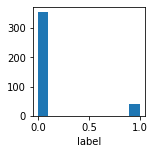

In [35]:
# plot label distribution
plt.figure(figsize=(2, 2))
plt.hist(math['label'])
plt.xlabel('label')

print('Number of samples = ' + str(math['label'].shape[0]))
print('Number of passing grades = ' + str(math['label'].loc[math['label'] == 1].shape[0]))
# Need to stratify the samples



In [36]:
# Set a Random State value
RANDOM_STATE = 3

# Set Python random a fixed value
import random
random.seed(RANDOM_STATE)

# Set numpy random a fixed value

np.random.seed(RANDOM_STATE)


In [37]:
feature_list=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
        19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
          36,37,38,39,40,41,42,'age','Medu','Fedu','traveltime','studytime','failures',
         'famrel','freetime','goout', 'Dalc','Walc','health','absences'
           ]
label=['label']

In [38]:
# features for training
X = math[feature_list].values
y=math[label].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=RANDOM_STATE)

In [40]:
# check size of data splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(264, 56)
(131, 56)
(264, 1)
(131, 1)


In [52]:
# Define scaler step of pipeline
scaler = Normalizer()
scalerSt=StandardScaler()  

In [46]:
# Logistic Regression:
lr = LogisticRegression(random_state=RANDOM_STATE)

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=2)

# Naive Bayes:
nb = GaussianNB()

# Random Forest:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

# Gradient Boosted Trees:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

In [47]:
# define function to get model metrics
def model_metrics(predictions, pipe):
    
    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp_cm.plot()

In [48]:
# define workflow for training and printing model evaluation metrics
def train_and_evaluate(scaler,model_name):
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    #pipe.fit(X_train, y_train)
    pipe.fit(X_train,y_train.ravel())

    # save predictions on test set
    predictions = pipe.predict(X_test)

    # display results and metrics
    model_metrics(predictions, pipe)

Training set score: 1.0
Test set score: 0.9007633587786259
              precision    recall  f1-score   support

         0.0    0.90076   1.00000   0.94779       118
         1.0    0.00000   0.00000   0.00000        13

    accuracy                        0.90076       131
   macro avg    0.45038   0.50000   0.47390       131
weighted avg    0.81137   0.90076   0.85374       131

[[0.90076336 0.        ]
 [0.09923664 0.        ]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


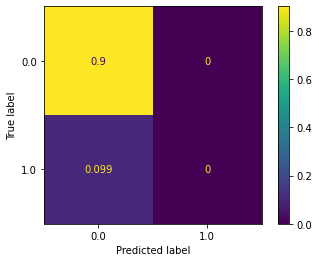

In [45]:
train_and_evaluate(scaler,rf)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py:1146: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


Training set score: 0.9053030303030303
Test set score: 0.9083969465648855
              precision    recall  f1-score   support

         0.0    0.91406   0.99153   0.95122       118
         1.0    0.66667   0.15385   0.25000        13

    accuracy                        0.90840       131
   macro avg    0.79036   0.57269   0.60061       131
weighted avg    0.88951   0.90840   0.88163       131

[[0.89312977 0.00763359]
 [0.08396947 0.01526718]]


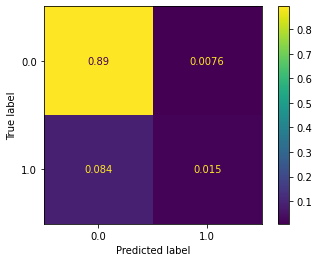

In [50]:
train_and_evaluate(scaler,knn)

Training set score: 0.5303030303030303
Test set score: 0.4961832061068702
              precision    recall  f1-score   support

         0.0    0.93333   0.47458   0.62921       118
         1.0    0.12676   0.69231   0.21429        13

    accuracy                        0.49618       131
   macro avg    0.53005   0.58344   0.42175       131
weighted avg    0.85329   0.49618   0.58804       131

[[0.42748092 0.47328244]
 [0.03053435 0.06870229]]


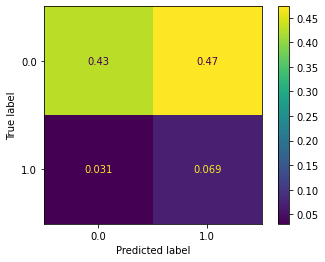

In [51]:
train_and_evaluate(scaler,nb)
#Naive Bayes with normalized features ([0,1] interval)

Training set score: 0.30303030303030304
Test set score: 0.3282442748091603
              precision    recall  f1-score   support

         0.0    0.91667   0.27966   0.42857       118
         1.0    0.10526   0.76923   0.18519        13

    accuracy                        0.32824       131
   macro avg    0.51096   0.52445   0.30688       131
weighted avg    0.83615   0.32824   0.40442       131

[[0.2519084  0.64885496]
 [0.02290076 0.07633588]]


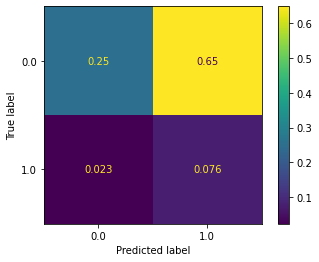

In [53]:
train_and_evaluate(scalerSt,nb)

In [ ]:
# Changing the scaler to standard Gaussian made the predictions even worse.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1352: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1561: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1207: DeprecationWarning: `np.bool` is a

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1207: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1207: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
/opt/anaconda3/lib/python3.7/site-packag

Training set score: 1.0
Test set score: 0.8473282442748091
              precision    recall  f1-score   support

         0.0    0.89516   0.94068   0.91736       118
         1.0    0.00000   0.00000   0.00000        13

    accuracy                        0.84733       131
   macro avg    0.44758   0.47034   0.45868       131
weighted avg    0.80633   0.84733   0.82632       131

[[0.84732824 0.05343511]
 [0.09923664 0.        ]]


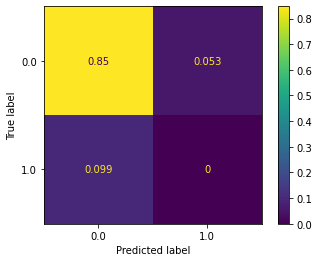

In [54]:
train_and_evaluate(scaler,gb)

In [ ]:
# Another example of overfitting and no correct predictions for true negative.

# In conclusion, k nearest neighbors are performing best, no overfitting.